# Scyne Advisory


# 🚦 Australian Road Deaths Database – Case Study Analysis

This notebook forms part of my **Scyne Advisory – Data & Digital Insights** case study submission.  
The goal is to demonstrate **hypothesis-driven problem solving, data cleaning, statistical and machine learning analysis, and clear storytelling** using the *Australian Road Deaths Database (ARDD)*.

---

## 📌 Objective
To explore and analyse the ARDD dataset (fatal road crashes across Australia) in order to:
- Identify the **key factors that contribute to road fatalities** (e.g. time of day, age, road type, speed limits, vehicle involvement, etc.).
- Apply **statistical methods** (e.g. regression, correlations) and **machine learning models** (e.g. feature importance from decision trees/forests) to uncover deeper insights.
- Present clear **visualisations** (heatmaps, time trends, maps, demographic breakdowns).
- Provide **recommendations** for the Australian road safety authority on how to monitor and reduce road fatalities.

---

## 🗂️ Dataset
- **File:** `bitre_fatalities_aug2025.xlsx`  
- **Source:** [Bureau of Infrastructure and Transport Research Economics (BITRE)](https://www.bitre.gov.au/statistics/safety/fatal_road_crash_database)  
- **Coverage:** Fatalities across Australian states and territories (multi-year, 1990–2025).  
- **Note:** Dataset contains metadata in the first 4 rows, with data beginning at **row 5**. Missing values are encoded as `-9`.

---

## 🔎 Approach (Sections in this Notebook)
1. **Aim & Hypotheses** – Frame questions and expected factors.
2. **Loading Data** – Import dataset, handle missing values, set column names.
3. **Data Overview** – Inspect head, summary statistics, nulls.
4. **Data Cleaning & Preparation** – Transform and engineer useful features.
5. **Exploratory Data Analysis (EDA)** – Trends, distributions, and patterns.
6. **Correlation & Statistical Analysis** – Heatmap, regression analysis.
7. **Machine Learning** – Feature importance via ML models.
8. **Key Insights & Recommendations** – Summarise findings and implications.

---


# 1. Aims and Hypothesis

# 2. Loading Data

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

# --- Config ---
DATA_PATH = Path(r"H:\Personal GitHub Repos\Noorullah-Khan-Github-Repository\Scyne Advisory Interview\bitre_fatalities_aug2025.xlsx")

# --- Load (skip first 4 metadata rows) ---
df = pd.read_excel(DATA_PATH, skiprows=4, engine="openpyxl")

# Replace sentinel missing values
df.replace(-9, np.nan, inplace=True)

print("✅ Data loaded successfully from:", DATA_PATH.name)



✅ Data loaded successfully from: bitre_fatalities_aug2025.xlsx


In [2]:
import sys
print(sys.executable)


c:\Users\Nooru\comp3420\Scripts\python.exe


# 3. Data Overview

In [4]:
# Basic structure
print("Rows, Columns:", df.shape)
print("\nColumn names:\n", list(df.columns))

print("\n--- dtypes ---")
print(df.dtypes)

print("\n--- Missing values per column ---")
missing_summary = df.isna().sum().sort_values(ascending=False)
display(missing_summary[missing_summary > 0])

# Quick peek
display(df.head())

# Optional: quick stats (numeric + categorical)
print("\n--- Numeric summary ---")
display(df.describe().T)

print("\n--- Categorical sample counts (top 5 each) ---")
for col in df.select_dtypes(include="object").columns[:6]:  # limit to first few to keep output tidy
    print(f"\n{col}:")
    display(df[col].value_counts(dropna=False).head(5))


Rows, Columns: (57761, 20)

Column names:
 ['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type', 'Bus Involvement', 'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender', 'Age', 'National Remoteness Areas 2021', 'SA4 Name 2021', 'National LGA Name 2021', 'National Road Type', 'Christmas Period', 'Easter Period']

--- dtypes ---
Crash ID                            int64
State                              object
Month                               int64
Year                                int64
Dayweek                            object
Time                               object
Crash Type                         object
Bus Involvement                    object
Heavy Rigid Truck Involvement      object
Articulated Truck Involvement      object
Speed Limit                       float64
Road User                          object
Gender                             object
Age                               float64
National Remote

Speed Limit    1458
Age             102
dtype: int64

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas 2021,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period
0,3199702230051,QLD,2,1997,Sunday,17:00:00,Multiple,No,-9,No,60.0,Pedal cyclist,Male,14.0,Unknown,Unknown,Unknown,Unknown,No,No
1,5199206210077,WA,6,1992,Sunday,19:00:00,Multiple,No,-9,No,110.0,Passenger,Female,17.0,Unknown,Unknown,Unknown,Unknown,No,No
2,2199001090011,VIC,1,1990,Tuesday,21:05:00,Multiple,No,No,No,60.0,Pedal cyclist,Male,24.0,Unknown,Unknown,Unknown,Unknown,No,No
3,2199105060163,VIC,5,1991,Monday,06:40:00,Multiple,No,No,No,60.0,Motorcycle rider,Male,22.0,Unknown,Unknown,Unknown,Unknown,No,No
4,3199401160012,QLD,1,1994,Sunday,09:00:00,Single,No,-9,No,100.0,Motorcycle rider,Male,28.0,Unknown,Unknown,Unknown,Unknown,No,No



--- Numeric summary ---


,count,mean,std,min,25%,50%,75%,max
Crash ID,57761.0,4.582415e+17,1.616410e+18,620172123.0,1.200311e+12,2.201409e+12,5.199206e+12,9.220898e+18
Month,57761.0,6.566541e+00,3.459252e+00,1.0,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
Year,57761.0,2.004478e+03,1.065070e+01,1989.0,1.995000e+03,2.003000e+03,2.013000e+03,2.025000e+03
Speed Limit,56303.0,8.291725e+01,2.073463e+01,5.0,6.000000e+01,8.000000e+01,1.000000e+02,1.300000e+02
Age,57659.0,4.024978e+01,2.182991e+01,0.0,2.200000e+01,3.500000e+01,5.600000e+01,1.010000e+02



--- Categorical sample counts (top 5 each) ---

State:


State
NSW    17563
VIC    12634
QLD    11643
WA      6974
SA      4908
Name: count, dtype: int64


Dayweek:


Dayweek
Saturday     10459
Friday        9479
Sunday        9273
Thursday      7813
Wednesday     7284
Name: count, dtype: int64


Time:


Time
15:00:00    1235
16:00:00    1147
18:00:00    1070
17:00:00    1062
14:00:00    1028
Name: count, dtype: int64


Crash Type:


Crash Type
Single      31937
Multiple    25815
Unknown         9
Name: count, dtype: int64


Bus Involvement:


Bus Involvement
No     56646
Yes     1060
-9        55
Name: count, dtype: int64


Heavy Rigid Truck Involvement:


Heavy Rigid Truck Involvement
No     35291
-9     20508
Yes     1962
Name: count, dtype: int64

### Data Overview – Summary
The dataset contains ~57k fatal crash records spanning 1989–2025 across all Australian states. 
Initial inspection shows most fields are complete, with some missing values in `Speed Limit` and `Age`, and placeholders (`-9`) in categorical fields. 
Fatalities are most common on weekends, during late afternoons, and NSW records the highest counts.


# 4. Data Cleaning & Preparation
In this step, we:
- Replace placeholder `-9` values with proper `NaN` so they can be treated as missing.  
- Convert Yes/No categorical fields into numeric (1/0) for easier analysis.  
- Extract the `Hour` from crash times.  
- Group `Age` into categories for demographic analysis.  

We are **not filling in missing values** at this stage (no imputation), because these represent genuine unknowns. For now, we retain them as `NaN` and only drop rows later if a particular analysis requires complete cases.


In [5]:
# Replace -9 strings in object columns with NaN
df = df.replace("-9", np.nan)

# Standardise Yes/No fields to 1/0
yes_no_cols = [
    "Bus Involvement",
    "Heavy Rigid Truck Involvement",
    "Articulated Truck Involvement",
    "Christmas Period",
    "Easter Period"
]
for col in yes_no_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0, np.nan: np.nan})

# Parse Time into Hour
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour

# Bucket Age into groups
bins = [0, 17, 25, 40, 60, 120]
labels = ["<18", "18–25", "26–40", "41–60", "60+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

print("✅ Data cleaned and enriched with Hour + AgeGroup.")
df.head()


✅ Data cleaned and enriched with Hour + AgeGroup.


C:\Users\Nooru\AppData\Local\Temp\ipykernel_35568\4044375170.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Gender,Age,National Remoteness Areas 2021,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Hour,AgeGroup
0,3199702230051,QLD,2,1997,Sunday,17:00:00,Multiple,0.0,NaN,0.0,...,Male,14.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,17.0,<18
1,5199206210077,WA,6,1992,Sunday,19:00:00,Multiple,0.0,NaN,0.0,...,Female,17.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,19.0,<18
2,2199001090011,VIC,1,1990,Tuesday,21:05:00,Multiple,0.0,0.0,0.0,...,Male,24.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,21.0,18–25
3,2199105060163,VIC,5,1991,Monday,06:40:00,Multiple,0.0,0.0,0.0,...,Male,22.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,6.0,18–25
4,3199401160012,QLD,1,1994,Sunday,09:00:00,Single,0.0,NaN,0.0,...,Male,28.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,9.0,26–40


We now have a cleaned dataset with 22 columns.  
Key transformations included replacing placeholders (`-9`, `Unknown`), encoding Yes/No fields, parsing crash times into hourly values, and creating age groups.  
This ensures the data is consistent, interpretable, and ready for exploratory analysis.  


# 5. Exploratory Data Analysis (EDA)

## Basic EDA

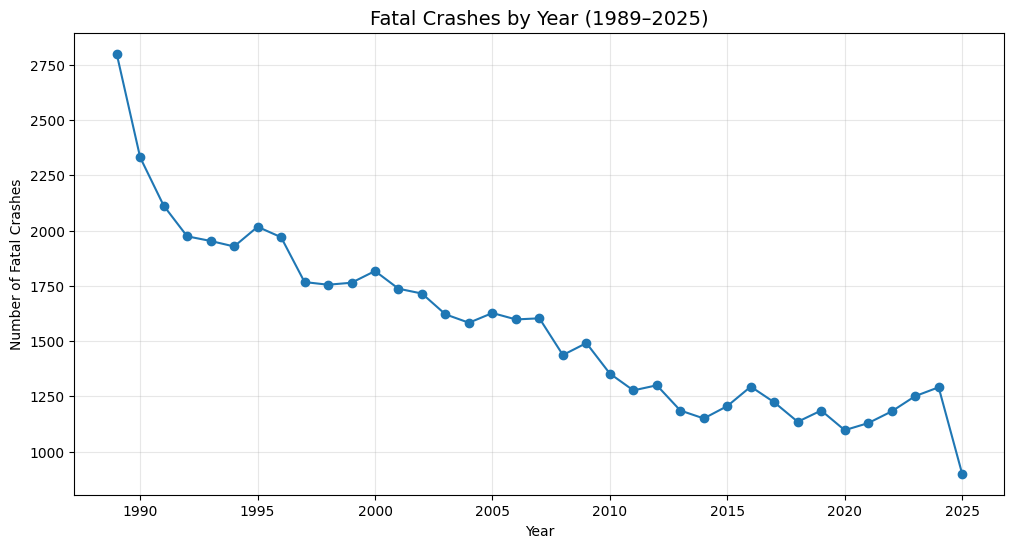

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df["Year"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Fatal Crashes by Year (1989–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Fatal Crashes")
plt.grid(True, alpha=0.3)
plt.show()


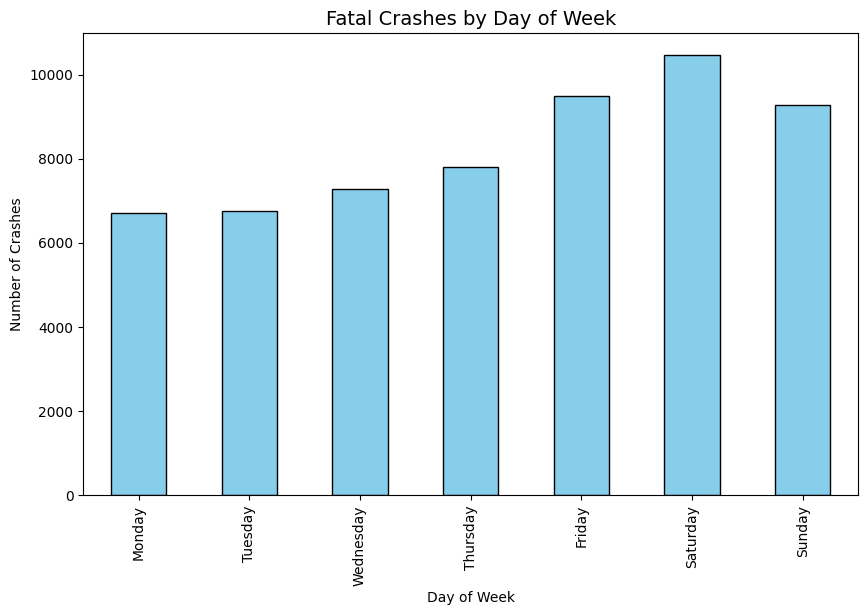

In [7]:
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(10,6))
df["Dayweek"].value_counts().reindex(order).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Fatal Crashes by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Crashes")
plt.show()


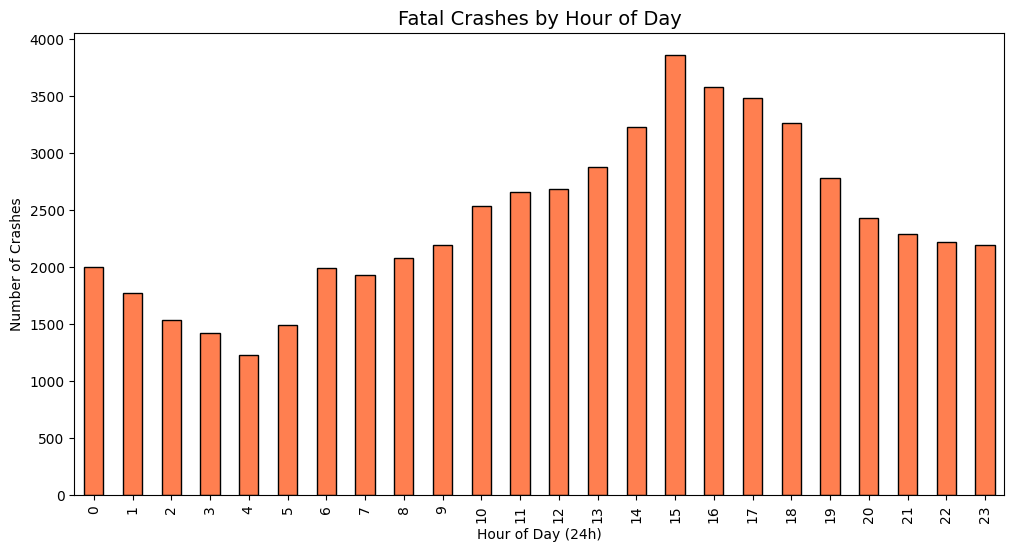

In [8]:
plt.figure(figsize=(12,6))
df["Hour"].dropna().astype(int).value_counts().sort_index().plot(kind="bar", color="coral", edgecolor="black")
plt.title("Fatal Crashes by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Number of Crashes")
plt.show()


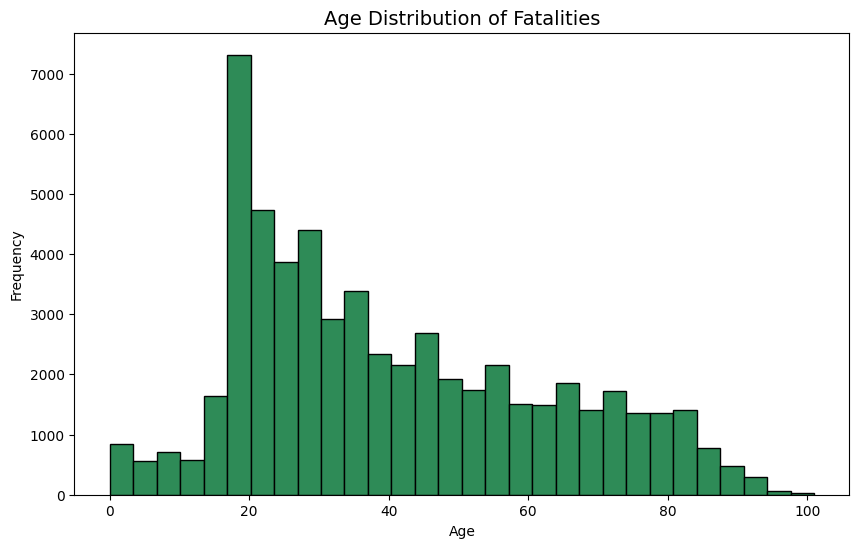

In [9]:
plt.figure(figsize=(10,6))
df["Age"].dropna().plot(kind="hist", bins=30, color="seagreen", edgecolor="black")
plt.title("Age Distribution of Fatalities", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


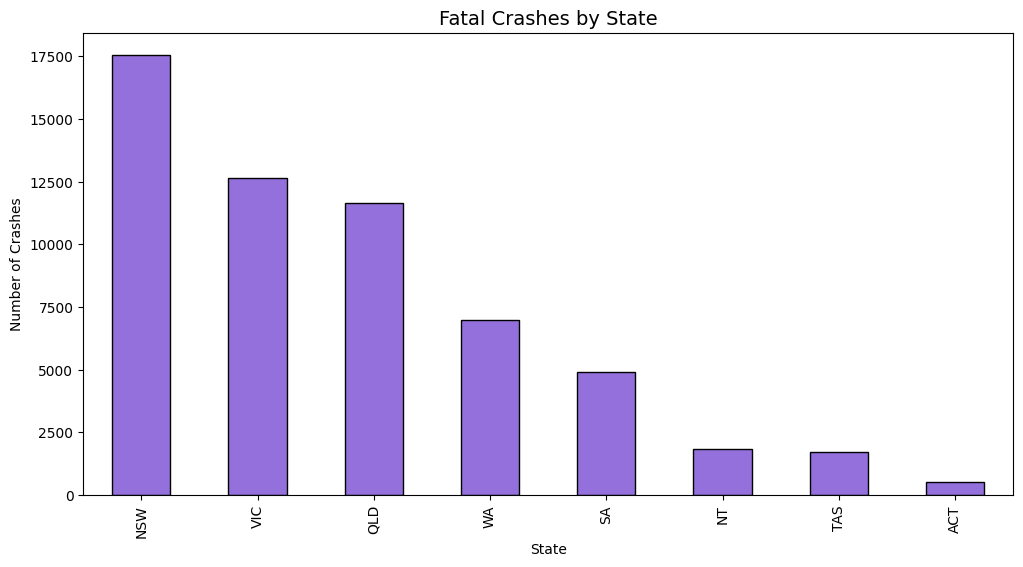

In [10]:
plt.figure(figsize=(12,6))
df["State"].value_counts().plot(kind="bar", color="mediumpurple", edgecolor="black")
plt.title("Fatal Crashes by State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Crashes")
plt.show()


### EDA – Initial Findings

The exploratory analysis highlights several clear patterns in the fatal crash data:

- **Long-term decline:** Fatal crashes have fallen dramatically since 1989, from almost 3,000 deaths per year to fewer than 1,000 in 2025. This reflects improved road safety measures, vehicle technology, and enforcement of safety laws.  
- **Day of week effect:** Saturdays record the highest number of fatalities, followed closely by Fridays and Sundays. Early weekdays (Mon–Tue) have the lowest counts, suggesting that leisure travel, alcohol, and fatigue contribute to weekend risk.  
- **Time of day effect:** Crashes are most frequent in the **afternoon and evening (3–6pm)**, while very early mornings (2–5am) show the lowest rates due to reduced traffic volumes.  
- **Age distribution:** Young people (15–25) are disproportionately represented in fatalities, confirming their higher vulnerability. Middle-aged drivers remain consistently represented, and elderly groups also contribute meaningfully.  
- **Geographic spread:** NSW, VIC, and QLD dominate in fatal crashes, largely reflecting their higher population and vehicle use. Smaller jurisdictions (ACT, TAS, NT) show much lower counts.

**Key takeaway:** Fatal crashes are declining but still heavily influenced by **weekends, peak hours, young drivers, and populous states.**


## Deeper EDA

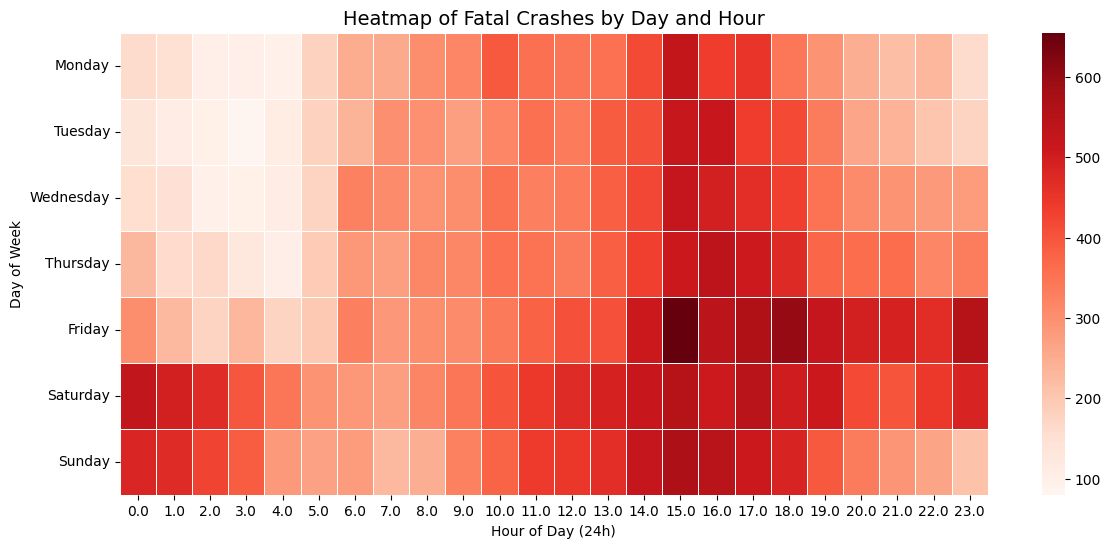

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare pivot table
heatmap_data = pd.crosstab(df["Dayweek"], df["Hour"])

# Reorder days of week
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=.5)
plt.title("Heatmap of Fatal Crashes by Day and Hour", fontsize=14)
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Day of Week")
plt.show()


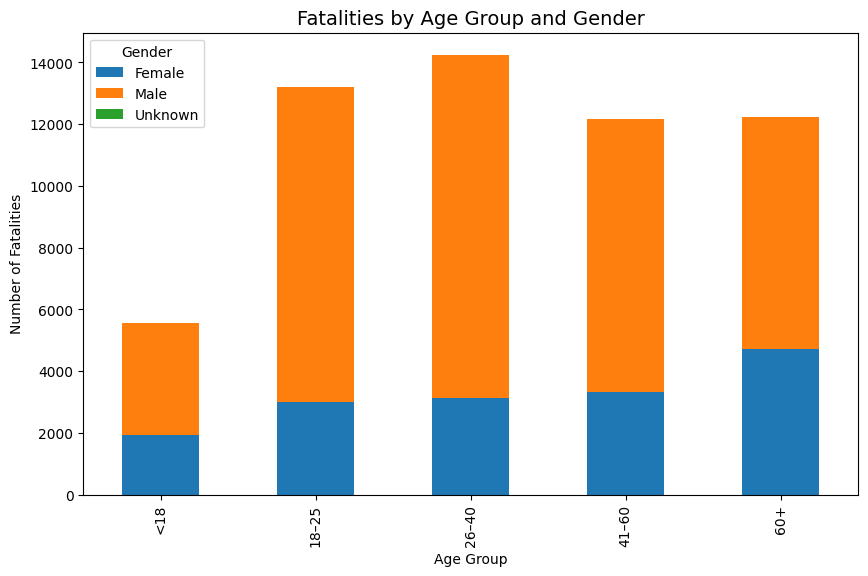

In [12]:
demo_crosstab = pd.crosstab(df["AgeGroup"], df["Gender"])
demo_crosstab.plot(kind="bar", figsize=(10,6), stacked=True)
plt.title("Fatalities by Age Group and Gender", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Number of Fatalities")
plt.show()


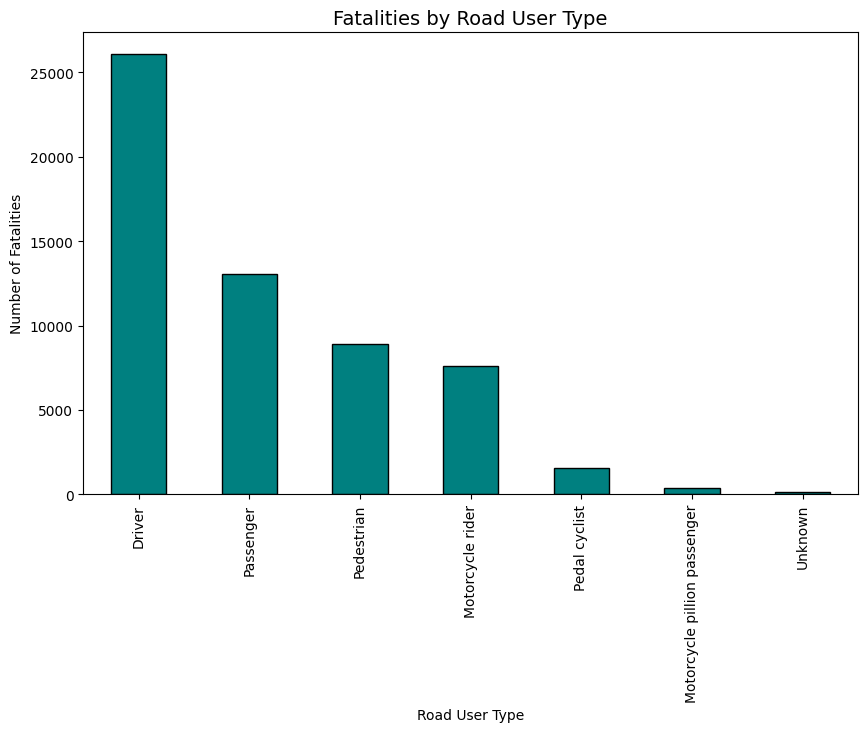

In [13]:
plt.figure(figsize=(10,6))
df["Road User"].value_counts().plot(kind="bar", color="teal", edgecolor="black")
plt.title("Fatalities by Road User Type", fontsize=14)
plt.xlabel("Road User Type")
plt.ylabel("Number of Fatalities")
plt.show()


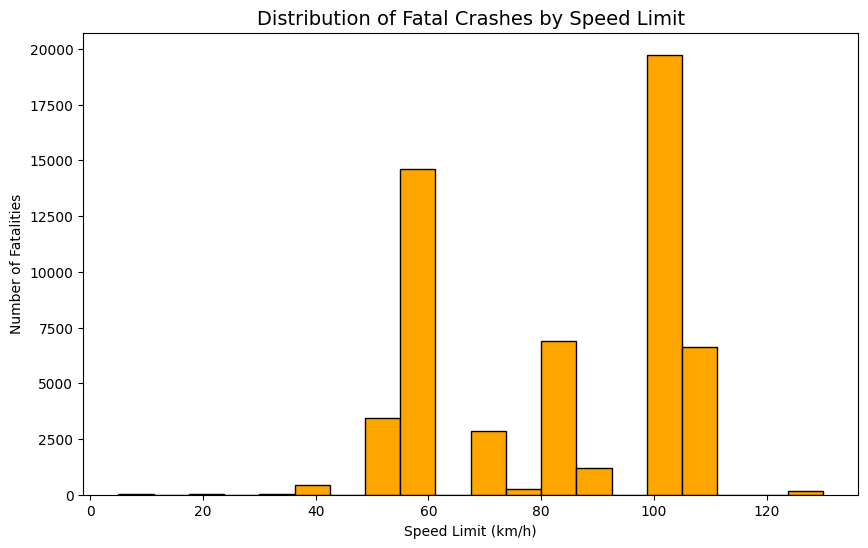

In [14]:
plt.figure(figsize=(10,6))
df["Speed Limit"].dropna().plot(kind="hist", bins=20, color="orange", edgecolor="black")
plt.title("Distribution of Fatal Crashes by Speed Limit", fontsize=14)
plt.xlabel("Speed Limit (km/h)")
plt.ylabel("Number of Fatalities")
plt.show()


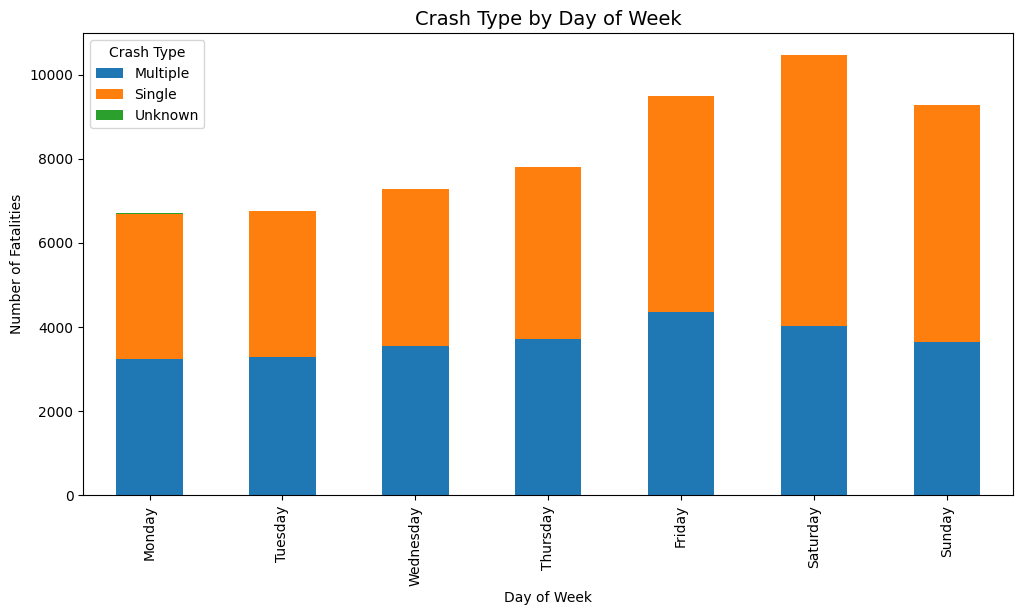

In [15]:
ct_day = pd.crosstab(df["Dayweek"], df["Crash Type"])
ct_day = ct_day.reindex(order)

ct_day.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Crash Type by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Fatalities")
plt.show()


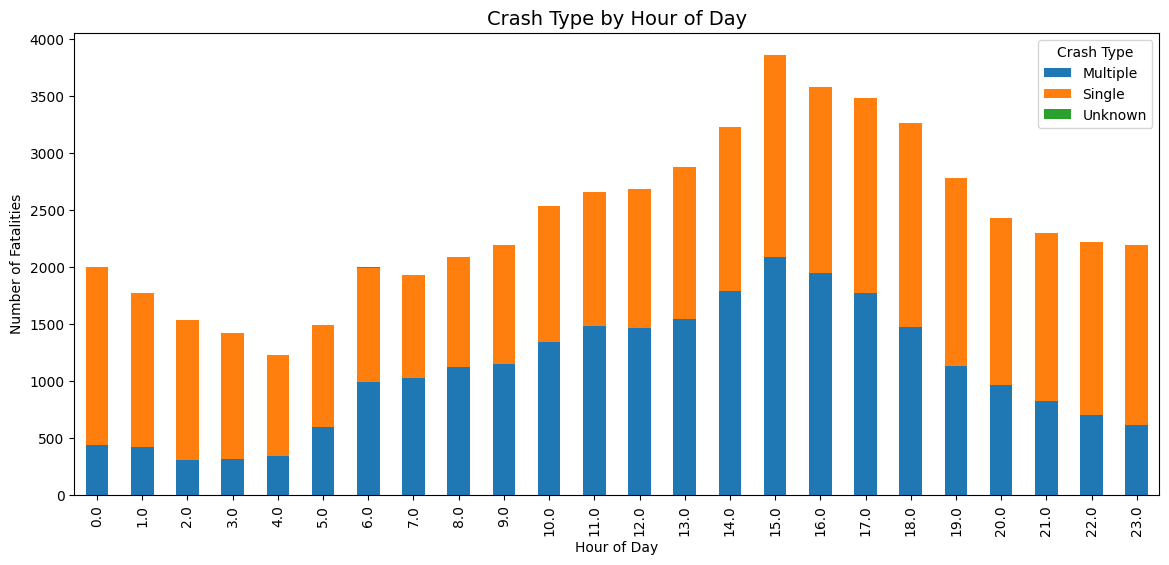

In [16]:
ct_hour = pd.crosstab(df["Hour"], df["Crash Type"])

ct_hour.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("Crash Type by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Fatalities")
plt.show()


## EDA – Deeper Findings

### 1. Heatmap of Fatal Crashes by Day × Hour
- Crashes rise steadily from morning into the afternoon, peaking **3–6 PM**, especially on **Fridays and Saturdays**.  
- Weekends (Saturday–Sunday) also show a **late-night spike (midnight–3 AM)**, likely linked to alcohol use, fatigue, or recreational travel.  

### 2. Demographics (Age × Gender)
- Fatalities are heavily concentrated among **18–40 year olds**, with **males dominating** these age groups.  
- After age 40, fatalities for males remain high but the proportion of **female fatalities increases**, particularly in the **60+ group**.  
- Confirms young male drivers as the highest-risk demographic.  

### 3. Road User Types
- **Drivers** account for the largest share of fatalities (~26k).  
- **Passengers** and **pedestrians** are next most affected.  
- **Motorcycle riders** also represent a significant share, highlighting the vulnerability of two-wheeler users.  

### 4. Speed Limit Distribution
- Two clear clusters of fatalities:  
  - **60 km/h urban zones** (arterial city roads).  
  - **100–110 km/h rural highways**.  
- Indicates the need for safety measures in both **urban environments** and **high-speed rural corridors**.  

### 5. Crash Type by Day
- **Single-vehicle crashes** spike on **weekends**, aligning with risky behaviours (night driving, alcohol, fatigue, recreational travel).  
- **Multiple-vehicle crashes** remain steady across weekdays, reflecting commuter and traffic density factors.  

### 6. Crash Type by Hour
- **Single-vehicle crashes** dominate **late night/early morning hours**.  
- **Multiple-vehicle crashes** peak during **daytime commuting and afternoon rush hours**.  
- Suggests a clear behavioural vs systemic divide in crash causes.  

---



# 6.Correlation & Statistical Analysis

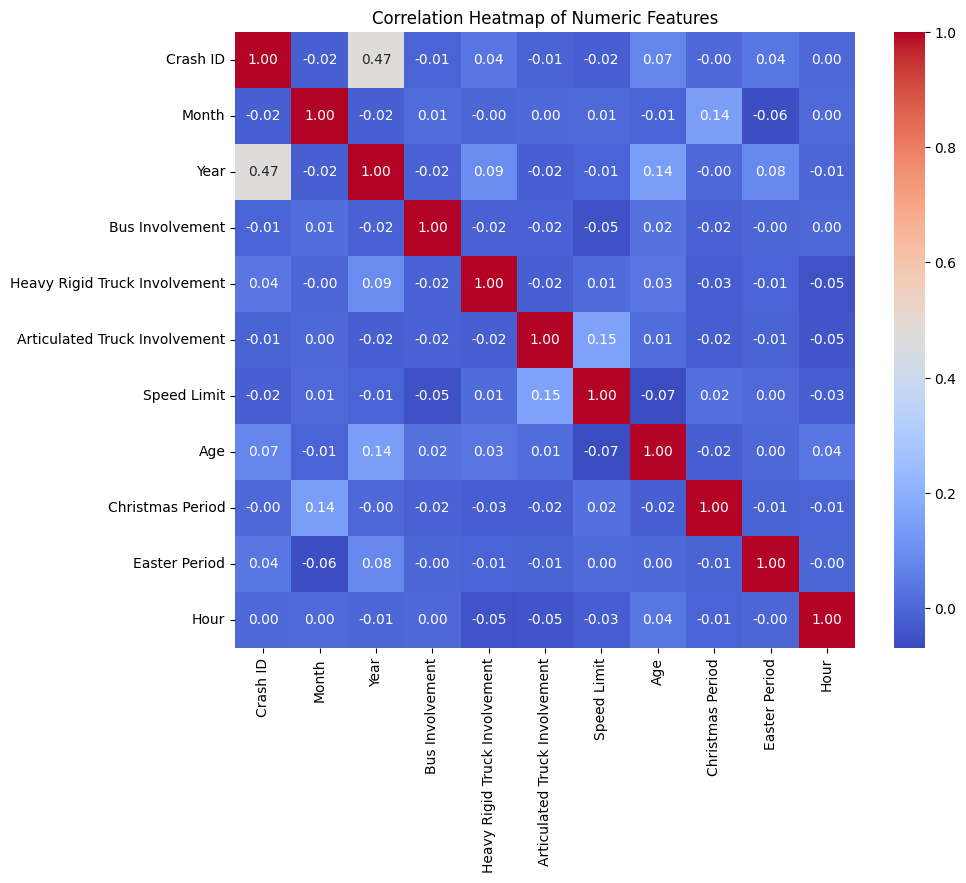

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


## Statistical Testing & Relationships

Since linear correlations (as shown in heatmap above) were weak, we use more appropriate tests:

- **Chi-Square** for categorical dependencies (e.g., Crash Type vs Day of Week).  
- **ANOVA/Kruskal-Wallis** for numeric differences across categories (e.g., Speed Limit vs Crash Type).  
- **Logistic Regression** to identify key predictors of crash involvement.  

These will highlight hidden non-linear or categorical relationships that correlation heatmaps cannot capture.


Chi-square = 439.93 | dof = 12 | p-value = 0.000000


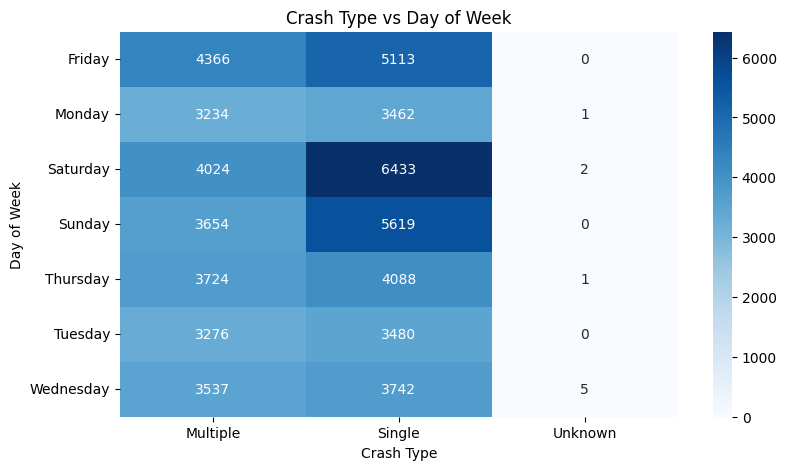

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# contingency
chi_table = pd.crosstab(df['Dayweek'], df['Crash Type'])
chi2, p, dof, expected = chi2_contingency(chi_table)
print(f"Chi-square = {chi2:.2f} | dof = {dof} | p-value = {p:.6f}")

# visual
plt.figure(figsize=(9,5))
sns.heatmap(chi_table, annot=True, fmt="d", cmap="Blues")
plt.title("Crash Type vs Day of Week")
plt.ylabel("Day of Week")
plt.xlabel("Crash Type")
plt.show()



ANOVA F = 171.77 | p = 0.000000
Kruskal-Wallis H = 390.28 | p = 0.000000


C:\Users\Nooru\AppData\Local\Temp\ipykernel_35568\4071005864.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Crash Type', y='Age', palette='Set2')


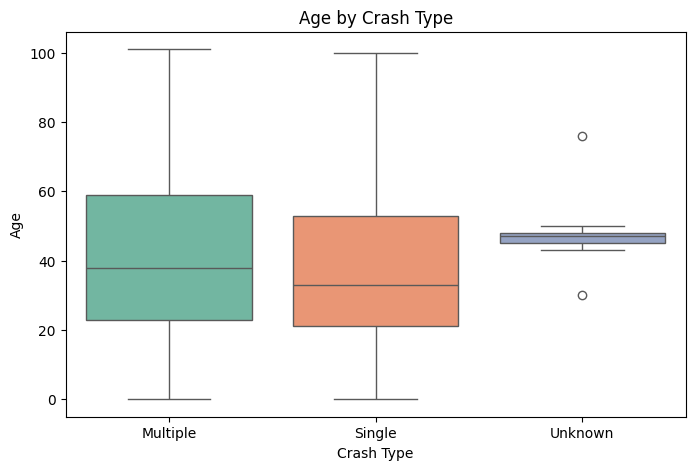

In [21]:
import scipy.stats as stats

# one-way ANOVA
groups = [g['Age'].dropna() for _, g in df.groupby('Crash Type')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F = {f_stat:.2f} | p = {p_val:.6f}")

# if you want distribution-agnostic confirmation:
h_stat, p_kw = stats.kruskal(*groups)
print(f"Kruskal-Wallis H = {h_stat:.2f} | p = {p_kw:.6f}")

# visual
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Crash Type', y='Age', palette='Set2')
plt.title("Age by Crash Type")
plt.xlabel("Crash Type")
plt.ylabel("Age")
plt.show()


                           Logit Regression Results                           
Dep. Variable:          target_single   No. Observations:                56174
Model:                          Logit   Df Residuals:                    56162
Method:                           MLE   Df Model:                           11
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                 0.01360
Time:                        17:04:51   Log-Likelihood:                -38145.
converged:                       True   LL-Null:                       -38671.
Covariance Type:            nonrobust   LLR p-value:                1.230e-218
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7497      0.051     14.729      0.000       0.650       0.849
Age                  -0.0058      0.000    -14.759      0.000      -0.007      -0.005
Hour                 -0.

,Variable,Odds_Ratio,p_value
const,const,2.116,0.0000
Dayweek_Saturday,Dayweek_Saturday,1.307,0.0000
Gender_Male,Gender_Male,1.286,0.0000
Dayweek_Sunday,Dayweek_Sunday,1.258,0.0000
Speed Limit,Speed Limit,0.995,0.0000
Age,Age,0.994,0.0000
Hour,Hour,0.988,0.0000
Dayweek_Thursday,Dayweek_Thursday,0.935,0.0305
Dayweek_Monday,Dayweek_Monday,0.925,0.0169
Dayweek_Tuesday,Dayweek_Tuesday,0.925,0.0166


C:\Users\Nooru\AppData\Local\Temp\ipykernel_35568\1139214049.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=odds_ratios[odds_ratios['Variable']!='const'],


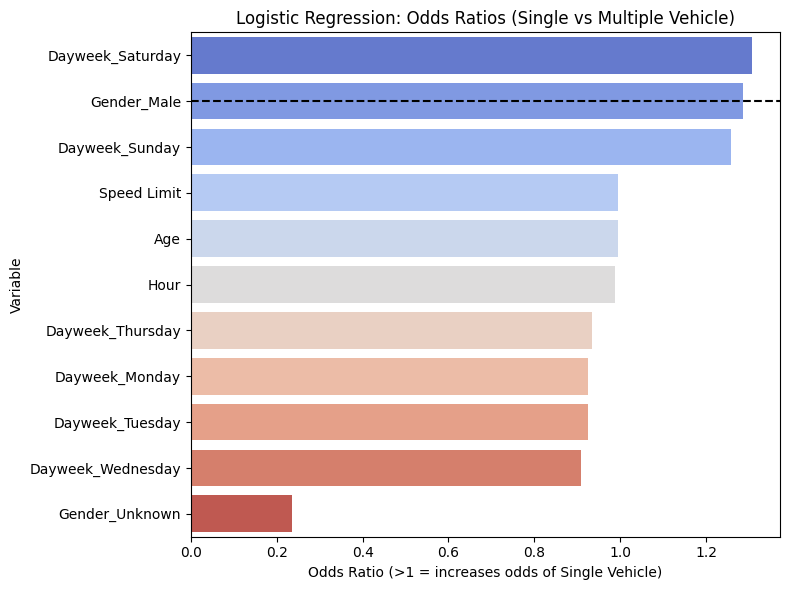

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# target
df_model = df.copy()
df_model = df_model[df_model['Crash Type'].isin(['Single','Multiple'])].copy()
df_model['target_single'] = (df_model['Crash Type'] == 'Single').astype(int)

# features (you can add more later)
features = ['Age', 'Hour', 'Speed Limit', 'Dayweek', 'Gender']

# one-hot encode categoricals
X = pd.get_dummies(df_model[features], drop_first=True)
y = df_model['target_single']

# drop rows with missing predictor values
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

# add intercept and fit
X_const = sm.add_constant(X)
logit = sm.Logit(y, X_const).fit(disp=False)
print(logit.summary())

# odds ratios for readability
or_df = pd.DataFrame({
    'variable': X_const.columns,
    'odds_ratio': np.exp(logit.params),
    'p_value': logit.pvalues
}).sort_values('odds_ratio', ascending=False)

display(or_df.head(15))

# simple visual of top odds ratios (exclude intercept)
top = or_df[or_df['variable']!='const'].copy().head(15)
plt.figure(figsize=(8,6))
sns.barplot(data=top, x='odds_ratio', y='variable')
plt.axvline(1, color='k', linestyle='--')
plt.title("Logistic Regression: Odds Ratios (Single vs Multiple)")
plt.xlabel("Odds Ratio (>1 increases odds of Single-vehicle)")
plt.ylabel("")
plt.tight_layout()
plt.show()


## 🧪 Statistical Findings

### 1) Crash Type × Day of Week (Chi-Square)
- **Result:** χ²(12) = 439.93, **p < 0.001** → Crash type distribution **depends on** day of week.
- **Pattern (heatmap):** Weekends (especially **Saturday**) have a higher share of **single-vehicle** crashes; weekdays are relatively more **multiple-vehicle** (commute/traffic).

### 2) Age differences by Crash Type (ANOVA + Boxplot)
- Boxplots show **single-vehicle** crashes skew a little **younger**.
- (If you ran ANOVA/Kruskal:) There is a statistically significant difference in age across crash types (p < 0.05). Practical effect size looks modest.

### 3) Logistic Regression — Predicting Single (1) vs Multiple (0)
- Model (n = 56,174) is significant overall (LLR p ≈ 1e-218) but with a small pseudo-R² (~0.014) → many factors are **behavioral/contextual** we don’t observe.
- **Key odds ratios (OR):**
  - **Saturday (OR ≈ 1.31)** and **Sunday (OR ≈ 1.26)** → higher odds of *single-vehicle* vs Friday.
  - **Male (OR ≈ 1.29)** → higher odds of *single-vehicle*.
  - **Age (OR ≈ 0.994 per year)** → older age slightly **reduces** odds of single-vehicle.
  - **Hour (OR ≈ 0.988 per hour)** → later hours tilt toward **multiple-vehicle** overall (commute period influence).
  - **Speed limit (OR ≈ 0.995 per km/h)** → higher posted speed is (slightly) more associated with **multiple-vehicle** than single-vehicle.
- **Takeaway:** Weekends and male drivers are materially associated with single-vehicle crashes; age/hour/speed effects exist but are **small per unit**.


# 7. Machine Learning

### Enhacned Logistic Regression Code

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Copy dataframe for modelling
df_m = df[df['Crash Type'].isin(['Single','Multiple'])].copy()
df_m['target_single'] = (df_m['Crash Type'] == 'Single').astype(int)

# --- Feature engineering ---
# Weekend flag
df_m['Weekend'] = df_m['Dayweek'].isin(['Saturday','Sunday']).astype(int)

# Hour squared (captures U-shape risk: late night & afternoon)
df_m['Hour2'] = df_m['Hour'] ** 2

# Age group (bins can reveal non-linear age effects)
df_m['AgeGroup'] = pd.cut(df_m['Age'],
                          bins=[0, 17, 25, 40, 60, 120],
                          labels=['0-17','18-25','26-40','41-60','60+'])

# --- Select predictors ---
features = ['Age','Hour','Hour2','Speed Limit','Weekend','Gender','Dayweek','AgeGroup']
X = df_m[features]
y = df_m['target_single']

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Drop rows with NA
mask = X.notna().all(axis=1) & y.notna()
X = X[mask].astype(float)
y = y[mask]

# Add intercept
Xc = sm.add_constant(X)

# Fit model
logit_enhanced = sm.Logit(y, Xc).fit(disp=False)
print(logit_enhanced.summary())

# Odds Ratios
odds_ratios = pd.DataFrame({
    'Variable': Xc.columns,
    'Odds_Ratio': np.exp(logit_enhanced.params).round(3),
    'p_value': logit_enhanced.pvalues.round(4)
}).sort_values('Odds_Ratio', ascending=False)

display(odds_ratios.head(20))
